# Importing Schlick Data

Relevant Paper: https://doi.org/10.1093/nar/gkac757 
    

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import mpl_toolkits.mplot3d
import utils
from scipy.spatial.distance import pdist, cdist, squareform
import utility 
from utility import plots_dir
import math

## Global Variables

In [2]:
subdirs = ["26_D", "44_D", "44_S", "70_D", "70_S", "nu_D", "nu_S"]
labels_26bp_D = ["26bp_0_1", "26bp_025_1",  "26bp_05_05",  "26bp_1_025"]
labels_44bp_D = ["44bp_0_1",  "44bp_025_1",  "44bp_05_05",  "44bp_1_025"]
labels_44bp_S = ["44bp_02", "44bp_05", "44bp_08", "44bp_0", "44bp_minus_08", "44bp_plus_08"]
labels_70bp_D = ["70bp_0_1", "70bp_025_1", "70bp_05_05", "70bp_1_025"]   
labels_70bp_S = ["70bp_02"]# , "70bp_08"] #70bp_08 has unresolved problems. Silence for now
labels_nu_D = ["nu_0_1","nu_025_1","nu_05_05","nu_1_025"]
labels_nu_S = ["nu_02", "nu_08", "nu_minus_02", "nu_plus_02"]

end_dirs = [labels_26bp_D, labels_44bp_D, labels_44bp_S, labels_70bp_D, labels_70bp_S, labels_nu_D, labels_nu_S]

files_26bp_D = [i + ".dat" for i in labels_26bp_D]
files_44bp_D = [i + ".dat" for i in labels_44bp_D]
files_44bp_S = [i + ".dat" for i in labels_44bp_S]
files_70bp_D = [i + ".dat" for i in labels_70bp_D]
files_70bp_S = [i + ".dat" for i in labels_70bp_S]
files_nu_D = [i + ".dat" for i in labels_nu_D]
files_nu_S = [i + ".dat" for i in labels_nu_D]

colnames = ["x", "y", "z"]

In [3]:
cores = 100
linkers_26 = 200 # Figured this one out because 9000 lines per snap. (9000-cores*4-cores*(hist_tails+link_hist))/4
linkers_44 = 400
linkers_70 = 700
linkers_nu = 414
hist_tails = 50
link_hist = 28
linker_array = [linkers_26, linkers_44, linkers_44, linkers_70, linkers_70, linkers_nu, linkers_nu]
total_snaps = 1000

In [4]:
schlick_folder = '/ru-auth/local/home/abrenner/myscratch/data_from_schlick/'
data_dir = "/lustre/fs4/risc_lab/store/risc_data/downloaded/schlick_coordinates/Trajectories/"

In [5]:
# traj = pd.read_csv(data_dir + subdirs[1] + "/44bp_05.dat",
#             header=None, sep='\s\s+', engine='python', names=colnames)

#### From Supplementary Material Table S2

In [6]:
non_uniform_spacing = [44, 80, 35, 26, 26, 70, 70, 62, 35, 26, 26, 44, 35, 53, 62, 44, 62, 53, 80, 35, 53, 80, 62, 53, 44, 26, 26, 35, 70, 44, 44, 26, 62, 26, 53, 26, 70, 35, 26, 80, 44, 80, 26, 26, 26, 53, 44, 70, 26, 80, 26, 44, 26, 53, 62, 35, 35, 26, 26, 62, 80, 26, 26, 35, 70, 35, 70, 44, 44, 26, 35, 26, 26, 26, 53, 35, 26, 80, 53, 35, 26, 35, 62, 35, 44, 35, 44, 35, 26, 26, 53, 80, 44, 53, 80, 53, 35, 26, 26, 70]

In [ ]:
# first_snap = traj[3*lines_per_snap:4*lines_per_snap]

In [ ]:
# cores_and_links = first_snap[:core_link_end_idx]
# cores_and_links

In [ ]:
# core_link_end_idx = 4*(cores+linkers)
# cores_and_links = first_snap[:core_link_end_idx]
# tails_and_h1 = first_snap[core_link_end_idx:]
# tail_pos = tails_and_h1[:hist_tails*cores]
# h1_pos = tails_and_h1[hist_tails*cores:]

In [ ]:
# # core_link_end_idx = 4*(cores+linkers)
# core_link_end_idx

In [ ]:
# h1_pos_new = h1_pos[np.abs(h1_pos.x) > 0 ]

In [ ]:
# positions = cores_and_links[::4]
# orientation1 = cores_and_links[1::4]
# orientation2 = cores_and_links[2::4]
# orientation3 = cores_and_links[3::4]

In [ ]:
# core_pos = positions[:cores]
# core_orientation1 = orientation1[:cores]
# core_orientation1 = orientation2[:cores]
# core_orientation1 = orientation3[:cores]

In [ ]:
# link_pos = positions[cores:cores+linkers]
# link_orientation1 = orientation1[cores:cores+linkers]
# link_orientation1 = orientation2[cores:cores+linkers]
# link_orientation1 = orientation3[cores:cores+linkers]

In [ ]:
# startidx = cores+linkers
# endidx = cores+linkers+cores*hist_tails
# tail_pos = positions[startidx:endidx]
# h1_pos = positions[endidx: endidx+cores*link_hist]


In [ ]:
# from mpl_toolkits.mplot3d import Axes3D
# %matplotlib notebook

In [ ]:
# # def randrange(n, vmin, vmax):
# #     '''
# #     Helper function to make an array of random numbers having shape (n, )
# #     with each number distributed Uniform(vmin, vmax).
# #     '''
# #     return (vmax - vmin)*np.random.rand(n) + vmin
# subset = 100
# my_cmap = plt.get_cmap('hsv')
# fig = plt.figure()
# # ax = fig.add_subplot(111, projection='3d')
# ax = fig.gca(projection='3d')
# linkers_per_core = linkers/cores
# m = cm.ScalarMappable(cmap=cm.jet)
# coresplotted = ax.scatter(core_pos.x, core_pos.y, core_pos.z, s = 50, c = "darkgrey")#, marker='hexagon2')
# # tailsplotted = ax.scatter(tail_pos.x, tail_pos.y, tail_pos.z, s = 1, c = "green", alpha=0.1)
# h1plotted = ax.scatter(h1_pos_new.x, h1_pos_new.y, h1_pos_new.z, s = 10, c = "red", alpha=0.1)
# # linkersplotted = ax.scatter(link_pos.x[:subset*4], link_pos.y[:subset*4], link_pos.z[:subset*4], c = (link_pos.x[:subset*4] + link_pos.y[:subset*4] + link_pos.z[:subset*4]), cmap=my_cmap,marker='.')

# # plt.colorbar(linkersplotted)
# # jet()

# ax.set_xlabel('X Label')
# ax.set_ylabel('Y Label')
# ax.set_zlabel('Z Label')

# plt.show()


In [5]:
def write_pdb_lines(arr, name, connect=None):
    N = len(arr[:,0]) #number of beads
    #Nucleosome Cores
    #Define default values if None given for atom specifiers
    Atom = [name for i in range(N)]
    serial = [i for i in range(N)]
    b = np.zeros(N)
    occup = np.ones(N)
    chain = ['A' for i in range(N)]
    res = ['DNA' for i in range(N)]
    element = ['C' for i in range(N)]
    
    #Initialize list of lines
    lines = []
    #loop over atoms
    for i in range(N):
        line = 'ATOM'.ljust(6)
        line += ('%s' %serial[i]).rjust(5)
        line += ('%s' %Atom[i]).rjust(5)
        line += ' '
        line += ('%s' %res[i]).rjust(3)
        line += ('%s' %chain[i]).rjust(2)
        line += ' '*8
        line += ('%.1f' % arr[i,0]).rjust(8)
        line += ('%.1f' % arr[i,1]).rjust(8)
        line += ('%.1f' % arr[i,2]).rjust(8)
        line += ('%.1f' % occup[i]).rjust(6)
        line += ('%.1f' % b[i]).rjust(6)
        line += element[i].rjust(12) 
        lines.append(line)
    return lines

In [6]:
def mkpdb(core_arr, link_arr, tail_arr, h1_arr, connect = None, topology = 'linear'):
    lines_cores = write_pdb_lines(core_arr, "C1")
    lines_linkers = write_pdb_lines(link_arr, "D1")
    lines_tails = write_pdb_lines(tail_arr, "T1")
    lines_h1 = write_pdb_lines(h1_arr, "H1")
#     N = len(lines_cores) + len(lines_linkers)
    #If no connectivity set is given, adjacent beads are connected while respecting topology
#     if connect is None:
#         connect = [(i,i+1) for i in range(N-1)]
#         if topology == 'circular':
#             connect.append((N-1,0))
    
    lines = lines_cores + lines_linkers + lines_tails + lines_h1
#     #loop over connections
#     for i,c in enumerate(connect):
#         line = 'CONECT'.rjust(6)
#         line += ('%s' %c[0]).rjust(5)
#         line += ('%s' %c[0]).rjust(5) 
#         line += ('%s' %c[1]).rjust(5)
#         lines.append(line)
#     lines.append('END')
    #return list of lines
    return lines


In [7]:
#################################################################
#Save a pdb file, given a list of lines
##################################################################
#inputs
#save_file - string containing file name
#lines - list of strings, each corresponding to a line of the pdb
#as generated by mk_pdb

def save_pdb(save_file,lines):
    with open(save_file, 'w') as f:
        for line in lines:
            f.write(line  + '\n')

In [39]:
# save_pdb(schlick_folder+'0_temp.pdb', mkpdb(np.array(core_pos),np.array(link_pos)))

In [40]:
# mkpdb(np.array(core_pos),np.array(link_pos), connect=None)

In [8]:
def snapshot_coords(complete_df, snapshot = 0, fp = None, linkers = None):
    """
    Return dataframes with the relevant coordinates
    FILEPATH ISSUES TO FIX
    """
    lines_per_snap = cores*4+linkers*4+cores*(hist_tails+link_hist)
    snap = complete_df[snapshot*lines_per_snap:(1+snapshot)*lines_per_snap]
#     print("df_snap_"+str(snapshot)+".csv")
    snap.to_csv(fp + "dfs/df_snap_"+str(snapshot)+".csv")
    core_link_end_idx = 4*(cores+linkers)
    # Could add labels to the dataframes here if it will be helpful later
    cores_and_links = snap[:core_link_end_idx]
    tails_and_h1 = snap[core_link_end_idx:]
    tails_df = tails_and_h1[:hist_tails*cores]
    h1_pos = tails_and_h1[hist_tails*cores:]
    # Many h1 values are zero across the 
    # board, we can get rid of these so there arent coords at the origin
    h1_df = h1_pos[np.abs(h1_pos.x) > 0 ]
    
    # Get mod 4 positions
    positions = cores_and_links[::4]
#     orientation1 = cores_and_links[1::4]
#     orientation2 = cores_and_links[2::4]
#     orientation3 = cores_and_links[3::4]

    cores_df = positions[:cores]
    linkers_df = positions[cores:]
    
    return cores_df, linkers_df, tails_df, h1_df

In [9]:
def linker_w_frames(link_df, snapshot = 0, linkers=None):
    """
    Only Works for uniform linkers
    """
    repeat_every = linkers/cores
    linker_index_pre = [list(np.repeat(idx, repeat_every)) for idx in range(0,cores)]
    first_flag_pre = [[idx+1] + list(np.repeat(0, repeat_every-1)) for idx in range(0,cores)]
    last_flag_pre = [list(np.repeat(0, repeat_every-1)) + [idx+1] for idx in range(0,cores)]

    #flatten
    linker_index = [item for sublist in linker_index_pre for item in sublist]
    first_flag = [item for sublist in first_flag_pre for item in sublist]
    last_flag = [item for sublist in last_flag_pre for item in sublist]
    link_df["link_idx"] = linker_index
    link_df["first_bead"] = first_flag
    link_df["last_bead"] = last_flag
    return link_df

In [14]:
# cores_per_snap, linkers_per_snap, tails_per_snap , h1_per_snap = snapshot_coords(traj, snapshot = 0, linkers = linkers=linkers_44)

In [15]:
# tester = linker_w_frames(linkers_per_snap)
# example_first_beads = tester[tester.first_bead > 0]
# example_last_beads = tester[tester.last_bead > 0]

## Save pdb files for viewing

In [16]:
# total_snaps = 1000
# for s in range(total_snaps):
#     mid_dir = '44_bp/'
#     cores_per_snap, linkers_per_snap, tails_per_snap, h1_per_snap = snapshot_coords(traj, snapshot = s, mid_folder = mid_dir, linkers = linkers_44)
#     linker_df_flagged = linker_w_frames(linkers_per_snap, snapshot = s, mid_folder = mid_dir, linkers = linkers_44)
#     linker_df_flagged.to_csv(schlick_folder+mid_dir+"dfs/flagged_linkers_"+str(s)+"snap.csv")
#     to_save = mkpdb(np.array(cores_per_snap),np.array(linkers_per_snap), np.array(tails_per_snap),np.array(h1_per_snap))
#     save_pdb(schlick_folder+mid_dir+"snapshots/"+str(s)+'_snapshot.pdb', to_save)    

In [17]:
# # Plot example of coordinates
# subset = 5
# xs = list(cores_per_snap.x)
# ys = list(cores_per_snap.y)
# zs = list(cores_per_snap.z)
# color_choices = ['red', 'orange', 'goldenrod', 'green', 'blue', 'indigo', 'violet', 'dark_violet']
# my_cmap = plt.get_cmap('hsv')
# fig = plt.figure()
# # ax = fig.add_subplot(111, projection='3d')
# ax = fig.gca(projection='3d')
# # linkers_per_core = linkers/cores
# m = cm.ScalarMappable(cmap=cm.jet)
# # coresplotted = ax.scatter(cores_per_snap.x[:subset], cores_per_snap.y[:subset], cores_per_snap.z[:subset], s = 50, c = "darkgrey")#, marker='hexagon2')
# # tailsplotted = ax.scatter(tails_per_snap.x[], tails_per_snap.y, tails_per_snap.z, s = 1, c = "green", alpha=0.1)
# # h1plotted = ax.scatter(h1_per_snap.x, h1_per_snap.y, h1_per_snap.z, s = 10, c = "red", alpha=0.1)
# for num in range(0, subset):
#     linkersplotted = ax.scatter(linkers_per_snap.x[num*4:(num+1)*4], linkers_per_snap.y[num*4:(num+1)*4], linkers_per_snap.z[num*4:(num+1)*4], c = color_choices[num])
#     coresplotted = ax.scatter(xs[num], ys[num], zs[num], s = 200, c = color_choices[num])
# ax.scatter(example_first_beads.x[:subset],example_first_beads.y[:subset], example_first_beads.z[:subset], marker = '*', s = 50)
# ax.scatter(example_last_beads.x[:subset],example_last_beads.y[:subset], example_last_beads.z[:subset], marker = '^', s = 50)
# # linkersplotted = ax.scatter(linkers_per_snap.x[4:8], linkers_per_snap.y[4:8], linkers_per_snap.z[4:8], c = 'orange')#(linkers_per_snap.x + linkers_per_snap.y + linkers_per_snap.z), cmap=my_cmap,marker='.')

# # # plt.colorbar(linkersplotted)
# # # jet()

# # ax.set_xlabel('X Label')
# # ax.set_ylabel('Y Label')
# # ax.set_zlabel('Z Label')

# plt.show()


# Draw in data for 70bp 

In [18]:
# traj_70 = pd.read_csv(data_dir + subdirs[2] + "/70bp_02.dat",
#             header=None, sep='\s\s+', engine='python', names=colnames)

In [19]:
# cores = 100
# linkers = 700
# hist_tails = 50
# link_hist = 28
# lines_per_snap = cores*4+linkers*4+cores*(hist_tails+link_hist)
# expected_70bp_lines = 11000
# lines_per_snap == expected_70bp_lines

In [20]:
# total_snaps = 1000
# for s in range(total_snaps):
#     mid_dir = '70_S/'
#     cores_per_snap, linkers_per_snap, tails_per_snap, h1_per_snap = snapshot_coords(traj_70, snapshot = s, mid_folder = mid_dir)
#     linker_df_flagged = linker_w_frames(linkers_per_snap, snapshot = s, mid_folder = mid_dir)
#     linker_df_flagged.to_csv(schlick_folder+mid_dir+"dfs/flagged_linkers_"+str(s)+"snap.csv")
#     to_save = mkpdb(np.array(cores_per_snap),np.array(linkers_per_snap), np.array(tails_per_snap),np.array(h1_per_snap))
#     save_pdb(schlick_folder+"70_S/snapshots/"+str(s)+'_snapshot.pdb', to_save)  

In [21]:
# total_snaps = 1000
# for s in range(total_snaps):
#     mid_dir = '70_S/'
#     cores_per_snap, linkers_per_snap, tails_per_snap, h1_per_snap = snapshot_coords(traj_70, snapshot = s, mid_folder = mid_dir, linkers = linkers_70)
#     linker_df_flagged = linker_w_frames(linkers_per_snap, snapshot = s, mid_folder = mid_dir, linkers = linkers_70)
#     linker_df_flagged.to_csv(schlick_folder+mid_dir+"dfs/flagged_linkers_"+str(s)+"snap.csv")
#     to_save = mkpdb(np.array(cores_per_snap),np.array(linkers_per_snap), np.array(tails_per_snap),np.array(h1_per_snap))
#     save_pdb(schlick_folder+mid_dir+"snapshots/"+str(s)+'_snapshot.pdb', to_save)  

# Draw in Data for Non-Uniform

In [22]:
# cores = 100
# linkers = 414
# hist_tails = 50
# link_hist = 28
# lines_per_snap = cores*4+linkers*4+cores*(hist_tails+link_hist)
# expected_70bp_lines = 9856
# lines_per_snap == expected_70bp_lines

In [23]:
# traj_nu = pd.read_csv(data_dir + subdirs[3] + "/nu_minus_02.dat",
#             header=None, sep='\s\s+', engine='python', names=colnames)

In [24]:
# total_snaps = 1000
# for s in range(total_snaps):
#     mid_dir = 'nu_S/'
#     cores_per_snap, linkers_per_snap, tails_per_snap, h1_per_snap = snapshot_coords(traj_nu, snapshot = s, mid_folder = mid_dir, linkers = linkers_nu)
# #     linker_df_flagged = linker_w_frames(linkers_per_snap, snapshot = s, mid_folder = mid_dir, linkers = linkers_nu)
# #     linker_df_flagged.to_csv(schlick_folder+mid_dir+"dfs/flagged_linkers_"+str(s)+"snap.csv")
#     to_save = mkpdb(np.array(cores_per_snap),np.array(linkers_per_snap), np.array(tails_per_snap),np.array(h1_per_snap))
#     save_pdb(schlick_folder+mid_dir+"snapshots/"+str(s)+'_snapshot.pdb', to_save)  

# We do not know how many beads oer snap in this situation -- maybe check the paper

In [25]:
# linkers_per_snap

May be a good idea to calculate euclidean distance between lagged rows. There should be 2 diff values, one about 1helix, the other the dist between entry and exit

# Draw in data for 26bp

In [26]:
# traj_26_025_1 = pd.read_csv(data_dir + subdirs[0] + "/26bp_025_1.dat",
#             header=None, sep='\s\s+', engine='python', names=colnames)
# traj_26_05_05 = pd.read_csv(data_dir + subdirs[0] + "/26bp_05_05.dat",
#             header=None, sep='\s\s+', engine='python', names=colnames)

In [27]:
# total_snaps = 1000
# for s in range(total_snaps):
#     mid_dir = '26_D_025_1/'
#     cores_per_snap, linkers_per_snap, tails_per_snap, h1_per_snap = snapshot_coords(traj_26_025_1, snapshot = s, mid_folder = mid_dir, linkers = linkers_26)
#     linker_df_flagged = linker_w_frames(linkers_per_snap, snapshot = s, mid_folder = mid_dir, linkers = linkers_26)
#     linker_df_flagged.to_csv(schlick_folder+mid_dir+"dfs/flagged_linkers_"+str(s)+"snap.csv")
#     to_save = mkpdb(np.array(cores_per_snap),np.array(linkers_per_snap), np.array(tails_per_snap),np.array(h1_per_snap))
#     save_pdb(schlick_folder+mid_dir+"snapshots/"+str(s)+'_snapshot.pdb', to_save)  

In [28]:
# total_snaps = 1000
# for s in range(total_snaps):
#     mid_dir = '26_D_05_05/'
#     cores_per_snap, linkers_per_snap, tails_per_snap, h1_per_snap = snapshot_coords(traj_26_05_05, snapshot = s, mid_folder = mid_dir, linkers = linkers_26)
#     linker_df_flagged = linker_w_frames(linkers_per_snap, snapshot = s, mid_folder = mid_dir, linkers = linkers_26)
#     linker_df_flagged.to_csv(schlick_folder+mid_dir+"dfs/flagged_linkers_"+str(s)+"snap.csv")
#     to_save = mkpdb(np.array(cores_per_snap),np.array(linkers_per_snap), np.array(tails_per_snap),np.array(h1_per_snap))
#     save_pdb(schlick_folder+mid_dir+"snapshots/"+str(s)+'_snapshot.pdb', to_save)  

# Draw in all data in one fell swoop

In [ ]:
for i in range(5,len(subdirs)): # Change 4 to 0, only doing like this due to interuption
    num_sub_dirs = len(end_dirs[i])
    for d in range(0,num_sub_dirs):
        out_path = schlick_folder + subdirs[i] + "/" + end_dirs[i][d] + "/"
        in_path = data_dir + subdirs[i] + "/" + end_dirs[i][d] + ".dat"
        print("Loading Data from ..." + in_path)
        # usecols=[0,1,2] Ignores laters columns
        # This appears to only be a problem for 70_S/70bp_08.dat in line 4575949
        # where there are 6 columns
        trajectory = pd.read_csv(in_path, header=None, sep='\s\s+', engine='python', names=colnames, usecols=[0,1,2])
        for s in range(total_snaps):  
            
            print("Getting snapshot coords for snapshot:   " + str(s))
            cores_per_snap, linkers_per_snap, tails_per_snap, h1_per_snap = snapshot_coords(trajectory, snapshot = s, fp = out_path, linkers = linker_array[i])
            
            print("Saving PDB")
            to_save = mkpdb(np.array(cores_per_snap),np.array(linkers_per_snap), np.array(tails_per_snap),np.array(h1_per_snap))
            save_pdb(out_path + "snapshots/"+str(s)+'_snapshot.pdb', to_save)  
            
            # nonuniform linkers require special handling
            if i > 4:
                continue
            
            else: 
                print("Flagging first and last linkers")
                linker_df_flagged = linker_w_frames(linkers_per_snap, snapshot = s, linkers = linker_array[i])
                linker_df_flagged.to_csv(out_path + "dfs/flagged_linkers_"+str(s)+"snap.csv")

        print("Writing output to ... " + out_path)

### Troubleshooting 70bp_08

In [43]:
in_path = data_dir + subdirs[4] + "/" + "70bp_08_manual_edit.dat"
trajectory = pd.read_csv(in_path, header=None, sep='\s\s+', engine='python', names=colnames)#, usecols=[0,1,2])
trajectory

,x,y,z
0,95.801598,62.927320,294.847124
1,0.164353,-0.885133,0.435349
2,0.693230,-0.210330,-0.689343
3,0.701727,0.415092,0.579032
4,90.616728,48.417799,314.053854
...,...,...,...
10999997,0.000000,0.000000,0.000000
10999998,0.000000,0.000000,0.000000
10999999,0.000000,0.000000,0.000000
11000000,0.000000,0.000000,0.000000


Line 4575949 of 70bp_08.dat had 6 columns instead of 3. Whole file was only 10999999 lines instead of the expected 11000000. Line break added in line 4575949 to create the expected number of lines. Original file 70bp_08.dat remained unedited. File with change implemented is 70bp_08_manial_edit.dat

5423002 and 8800002 also had 6 lines... not sure what is going on. Pattern, last column on the 3rd column is an integer, not a float (fewer sig figs)

# Run Micro-C

In [10]:
def get_contact_rate_curve(positions_df, snapshot = 0, cores = 100):
    """
    Currently only for tandem. Add in-in and out-out
    """
    in_positions = np.array(positions_df[positions_df.first_bead > 0][['x','y','z']])
    out_positions = np.array(positions_df[positions_df.last_bead > 0][['x','y','z']])

    pairwise_dists_in = pdist(in_positions)
    pairwise_dists_in
    prob_mat_in = squareform([utils.sigmoid(i) for i in pairwise_dists_in])

    n_plus_1_diag = np.diagonal(prob_mat_in, offset=1)
    # np.sum because we treat probabilities as counts. 
    # correct counts with factor of cores/len(n + x possible contacts)
    # Divide by number of cores to get the contact rate.
    # This ends up being np.sum(n_plus_1_diag)*cores/len(n_plus_1_diag)/cores 
    # or 
    # np.sum(n_plus_1_diag)/len(n_plus_1_diag) 
    # which is the same as the mean
    n_plus_1 = np.average(n_plus_1_diag)

    n_plus_2_diag = np.diagonal(prob_mat_in, offset=2)
    n_plus_2 = np.average(n_plus_2_diag)

    n_plus_3_diag = np.diagonal(prob_mat_in, offset=3)
    n_plus_3 = np.average(n_plus_3_diag)

    n_plus_4_diag = np.diagonal(prob_mat_in, offset=4)
    n_plus_4 = np.average(n_plus_4_diag)

    n_plus_5_diag = np.diagonal(prob_mat_in, offset=5)
    n_plus_5 = np.average(n_plus_5_diag)

    contact_curve = np.array([n_plus_1, n_plus_2, n_plus_3, n_plus_4, n_plus_5])

    return contact_curve    

def get_dists(positions_df, snapshot = 0, cores = 100):
    """
    Currently only for tandem. Add in-in and out-out
    """
    in_positions = np.array(positions_df[positions_df.first_bead > 0][['x','y','z']])
    out_positions = np.array(positions_df[positions_df.last_bead > 0][['x','y','z']])

    pairwise_dists_in = pdist(in_positions)
    pairwise_dists_in
    distances = squareform(pairwise_dists_in)

    return distances 

def get_tandem_dists(positions_df, snapshot = 0, cores = 100):
    """
    Currently only for tandem. Add in-in and out-out
    """
    in_positions = np.array(positions_df[positions_df.first_bead > 0][['x','y','z']])
    out_positions = np.array(positions_df[positions_df.last_bead > 0][['x','y','z']])

    pairwise_dists_in = pdist(in_positions)
    pairwise_dists_out = pdist(out_positions)
    
    tandem_in_dists = squareform(pairwise_dists_in)
    tandem_out_dists = squareform(pairwise_dists_out)

    return tandem_in_dists, tandem_out_dists

## Plot all

In [11]:
subdirs_modified = subdirs[:-2]
end_dirs_modified = end_dirs[:-2] # make sure this ignores nus

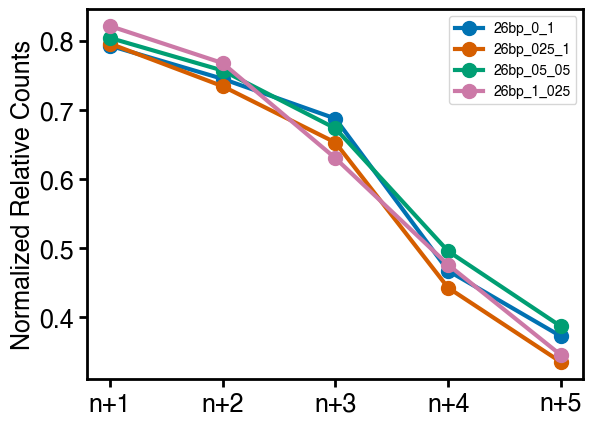

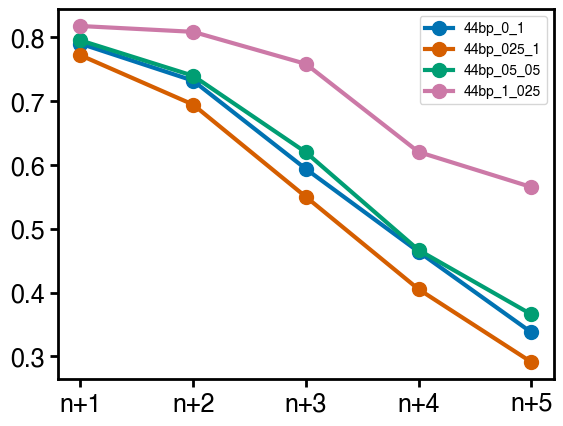

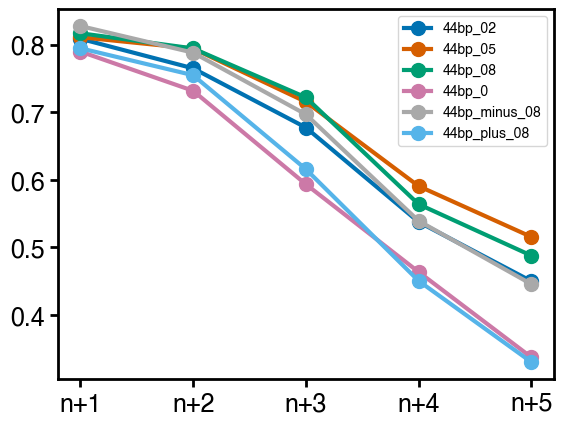

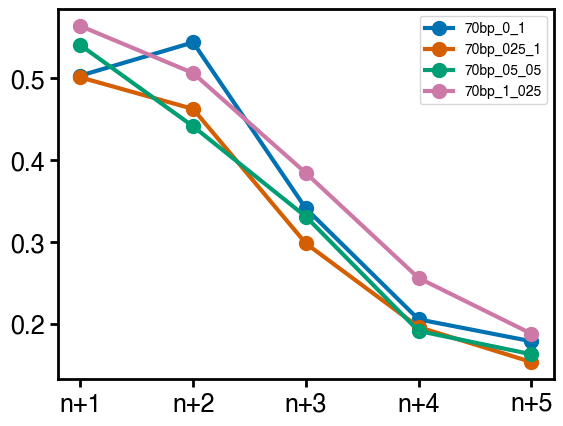

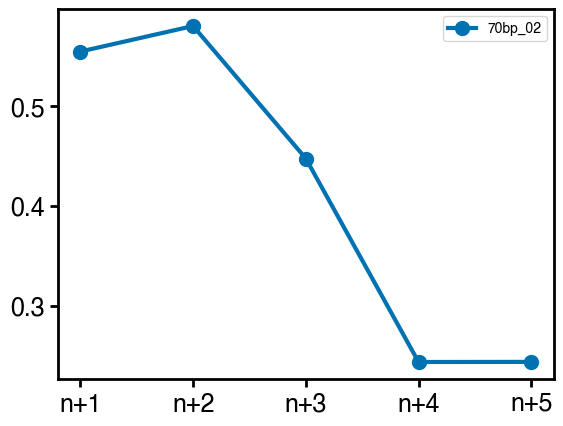

In [46]:
total_snaps = 30
subdirs_modified
fig, ax = plt.subplots()
num_contacts = 5
for cond in range(0,len(subdirs_modified)):
    for traj in range(0,len(end_dirs_modified[cond])):
        dfs_dir = schlick_folder + subdirs_modified[cond] + "/" + end_dirs_modified[cond][traj] + "/dfs/"
        contact_rates_per_snap = np.zeros((total_snaps,num_contacts))
        for i in range(0,total_snaps):
            positions = pd.read_csv(dfs_dir+"flagged_linkers_"+str(i)+"snap.csv")
            contact_rates_per_snap[i,:] = get_contact_rate_curve(positions_df = positions, snapshot = i)
        contact_rate = np.average(contact_rates_per_snap, axis = 0)
        plt.plot(['n+1','n+2','n+3','n+4','n+5'],contact_rate, label = end_dirs_modified[cond][traj], marker = "o") 
        ax.set_ylabel('Normalized Relative Counts')
    plt.legend()
#     plt.savefig(schlick_folder + "micro_c_results/sigmoid_"+subdirs_modified[cond]+".pdf")
    plt.show()

show sigmoid

Text(0, 0.5, 'Contact Prob.')

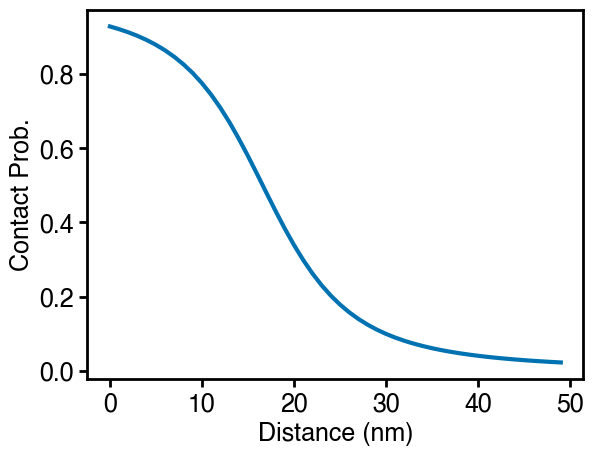

In [12]:
sig_to_plot = [utils.sigmoid(i) for i in range(50)]
fig, ax = plt.subplots()
plt.plot(sig_to_plot)
ax.set_xlabel("Distance (nm)")
ax.set_ylabel("Contact Prob.")
# ax.text(30, 0.8, "Hi", fontsize = "xx-large")
# plt.savefig(schlick_folder + "micro_c_results/sigmoid_applied.pdf")

# Plot Only Distances

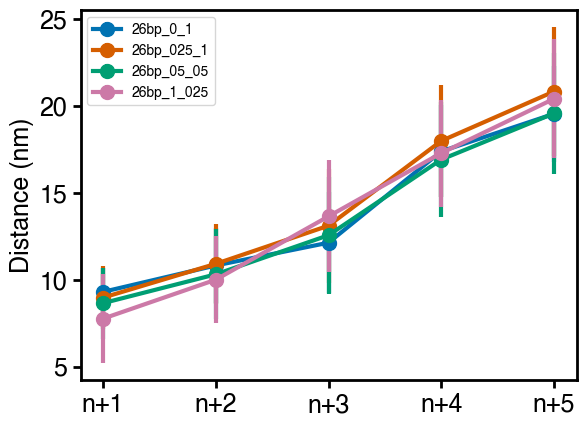

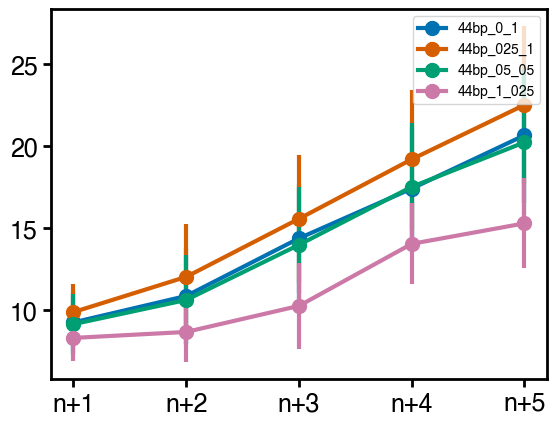

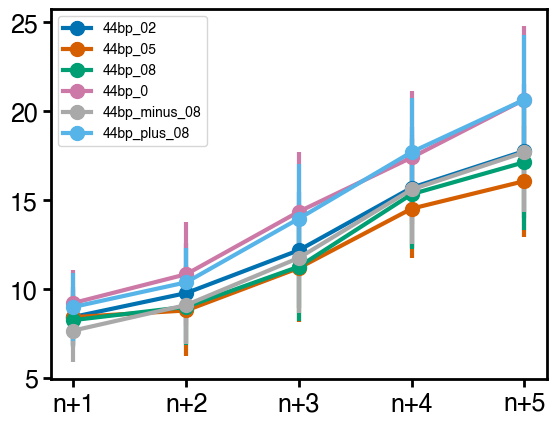

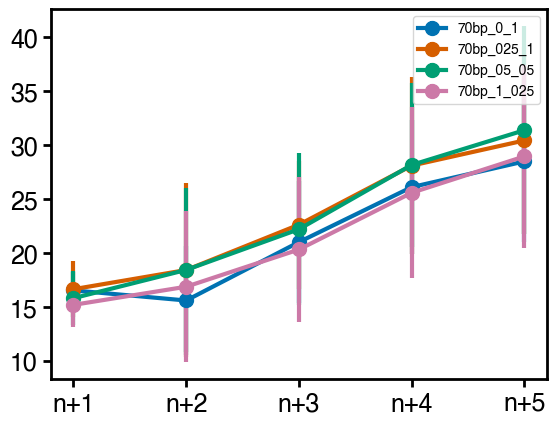

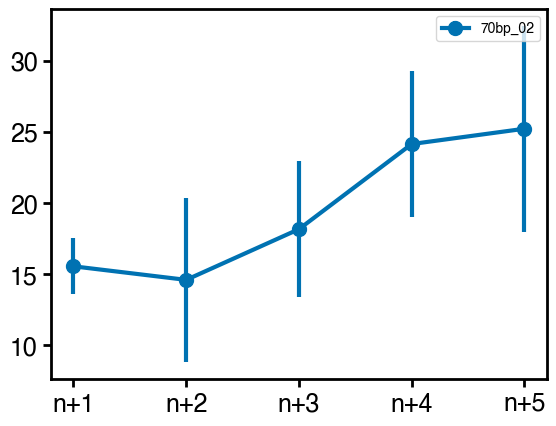

In [13]:
total_snaps = 10
subdirs_modified
fig, ax = plt.subplots()
num_contacts = 5
for cond in range(0,len(subdirs_modified)):
    for traj in range(0,len(end_dirs_modified[cond])):
        dfs_dir = schlick_folder + subdirs_modified[cond] + "/" + end_dirs_modified[cond][traj] + "/dfs/"
        dists_per_snap = np.zeros((total_snaps,num_contacts))
        errs_per_snap = np.zeros((total_snaps,num_contacts))
        for i in range(0,total_snaps):
            positions = pd.read_csv(dfs_dir+"flagged_linkers_"+str(i)+"snap.csv")
            snapshot_dists = get_dists(positions_df = positions, snapshot = i)
            for c in range(0,5):
                dists_per_snap[i,c] = np.average(np.diagonal(snapshot_dists, offset=c+1))
                errs_per_snap[i,c] = np.std(np.diagonal(snapshot_dists, offset=c+1))
        distances = np.average(dists_per_snap, axis = 0)
        errs = np.average(errs_per_snap, axis = 0)
        
        plt.errorbar(['n+1','n+2','n+3','n+4','n+5'],distances, yerr=errs, label = end_dirs_modified[cond][traj], marker = "o") 
        ax.set_ylabel('Distance (nm)')
    plt.legend()
#     plt.savefig(schlick_folder + "micro_c_results/dists_"+subdirs_modified[cond]+".pdf")
    plt.show()

In [49]:
subdirs_short = subdirs_modified[:3]

In [48]:
# total_snaps = 50
# nucs = 100
# fig, ax = plt.subplots()
# for cond in range(0,len(subdirs_short)):
#     for traj in range(0,len(end_dirs_modified[cond])):
#         dfs_dir = schlick_folder + subdirs_short[cond] + "/" + end_dirs_modified[cond][traj] + "/dfs/"
#         n_n1_dists = np.zeros((total_snaps,nucs - 1))
#         n_n2_dists = np.zeros((total_snaps,nucs - 2))
#         n_n3_dists = np.zeros((total_snaps,nucs - 3))
#         n_n4_dists = np.zeros((total_snaps,nucs - 4))
#         n_n5_dists = np.zeros((total_snaps,nucs - 5))
#         for i in range(0,total_snaps):
#             positions = pd.read_csv(dfs_dir+"flagged_linkers_"+str(i)+"snap.csv")
#             snapshot_dists = get_dists(positions_df = positions, snapshot = i)
#             n_n1_dists[i] = np.diagonal(snapshot_dists, offset=1)
#             n_n2_dists[i] = np.diagonal(snapshot_dists, offset=2)
#             n_n3_dists[i] = np.diagonal(snapshot_dists, offset=3)
#             n_n4_dists[i] = np.diagonal(snapshot_dists, offset=4)
#             n_n5_dists[i] = np.diagonal(snapshot_dists, offset=5)
#         distances = np.array([np.mean(n_n1_dists)
#                               , np.mean(n_n2_dists)
#                               , np.mean(n_n3_dists)
#                               , np.mean(n_n4_dists)
#                               , np.mean(n_n5_dists)])
#         errors = np.array([np.std(n_n1_dists)
#                               , np.std(n_n2_dists)
#                               , np.std(n_n3_dists)
#                               , np.std(n_n4_dists)
#                               , np.std(n_n5_dists)])
#         plt.errorbar(['n+1','n+2','n+3','n+4','n+5'], distances, yerr=errors, label = end_dirs_modified[cond][traj], marker = "o") 
#         plt.legend()
#     plt.show()

In [51]:
end_dirs_limited = [['26bp_0_1', '26bp_1_025'],
 ['44bp_0_1','44bp_1_025'], #  '44bp_025_1', '44bp_05_05', 
 ['44bp_0', '44bp_08'] # , '44bp_minus_08', '44bp_plus_08', '44bp_02', '44bp_05'
 ]

track_labels = [['0_1', '1_25'],
 ['0_1', '1_25'], #  '44bp_025_1', '44bp_05_05', 
 ['H1 Low', 'H1 High'] # , '44bp_minus_08', '44bp_plus_08', '44bp_02', '44bp_05'
 ]

In [58]:
def process_trajectory(dfs_dir, total_snaps, nucs):
    # Use doctionary comprehension to store distances for n+1 to n+5 contacts
    dists = {i: np.zeros((2*total_snaps, nucs - i)) for i in range(1, 6)}
    
    # Collect distances
    for i in range(total_snaps):
        positions = pd.read_csv(f"{dfs_dir}flagged_linkers_{i}snap.csv")
        snapshot_dists_in, snapshot_dists_out = get_tandem_dists(positions_df=positions, snapshot=i)
        for j in range(1, 6):
            dists[j][i] = np.diagonal(snapshot_dists_in, offset=j)
            # Populate right half of array with tandem exit-exit distances
            dists[j][total_snaps + i] = np.diagonal(snapshot_dists_out, offset=j)
    
    # Calculate mean distances and standard deviations
#     distances = np.array([np.mean(dists[i]) for i in range(1, 6)])
#     errors = np.array([np.std(dists[i]) for i in range(1, 6)])
    
    return dists #distances, errors

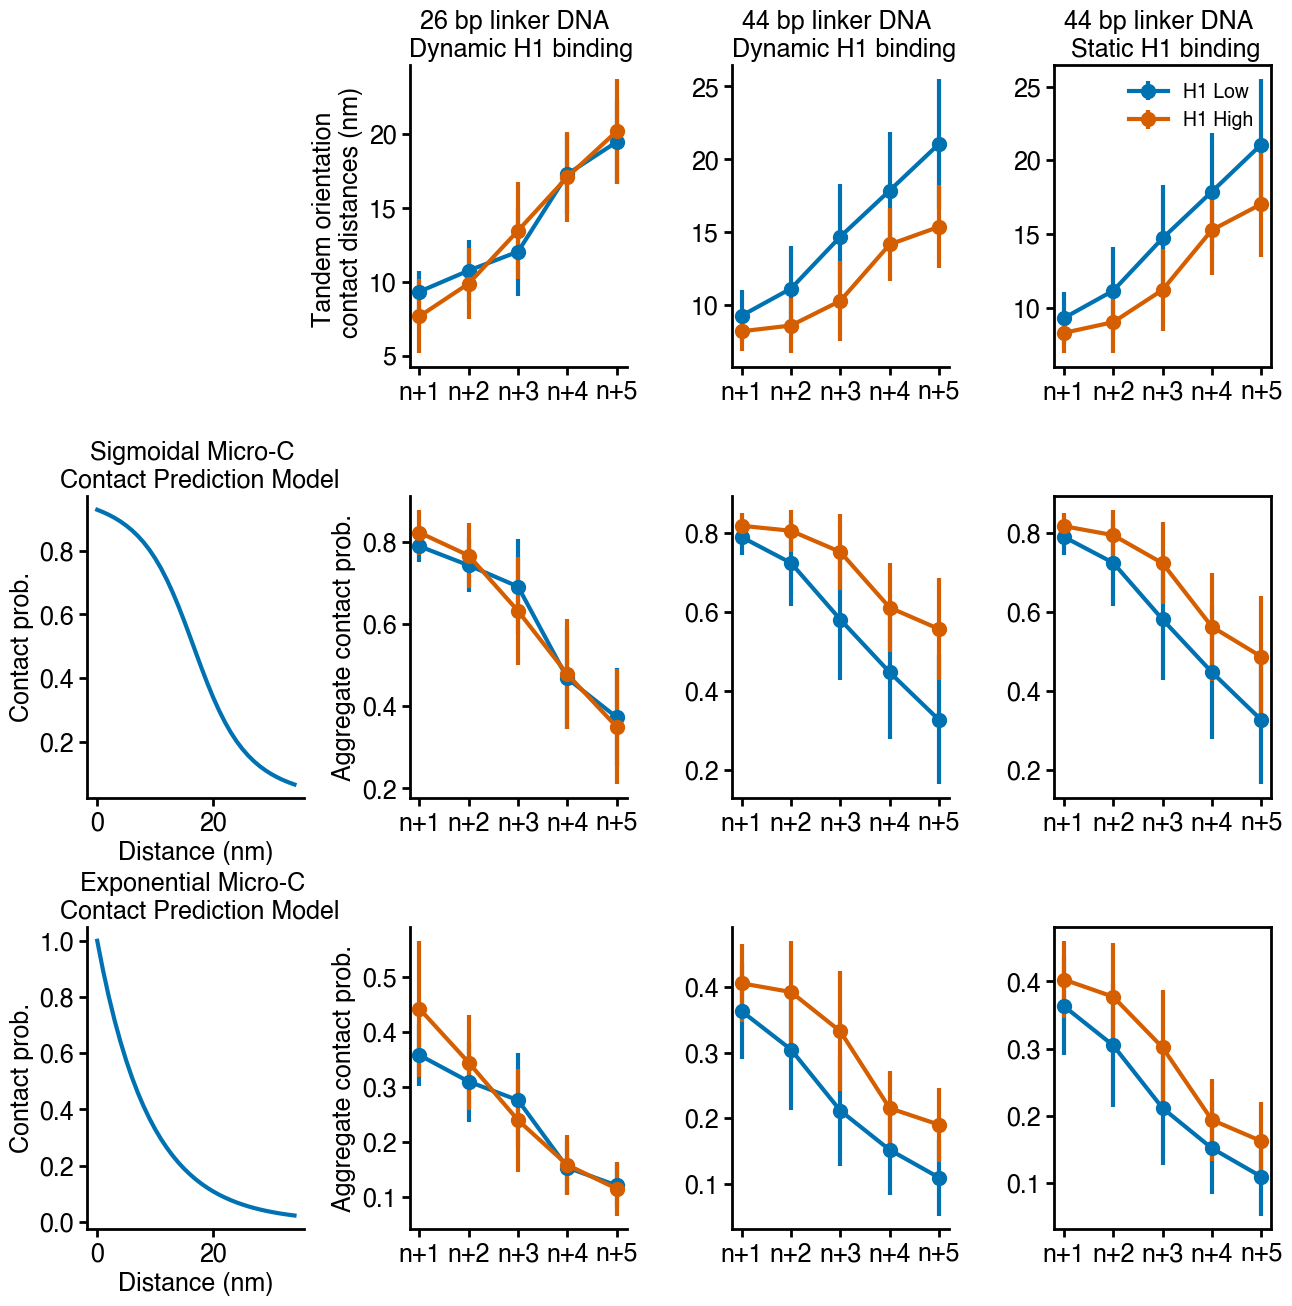

In [112]:
total_snaps = 2#1000 # make 1000 at the end
nucs = 100
fig, ax = plt.subplots(3, 4, figsize=(13, 13), gridspec_kw={'width_ratios': [3, 3, 3, 3]})
exp_length_scale = 9.0

# define exponential
exp_microc_func = lambda x: np.exp(-x / exp_length_scale)

for cond in range(len(subdirs_short)):
#     print(cond)
    for traj in range(len(end_dirs_limited[cond])):
        dfs_dir = f"{schlick_folder}{subdirs_short[cond]}/{end_dirs_limited[cond][traj]}/dfs/"
        dists = process_trajectory(dfs_dir, total_snaps, nucs)
        distances = np.array([np.mean(dists[i]) for i in range(1, 6)])
        errors = np.array([np.std(dists[i]) for i in range(1, 6)])
        
        sigmoid_microc = np.array([np.mean(utils.sigmoid(dists[i])) for i in range(1, 6)])
        sigmoid_microc_errs = np.array([np.std(utils.sigmoid(dists[i])) for i in range(1, 6)])
        
        
#         microc_ecxnp.exp(-dists[i] / exp_length_scale)
        exp_microc =  np.array([np.mean(exp_microc_func(dists[i])) for i in range(1, 6)])
        exp_microc_errs =  np.array([np.std(exp_microc_func(dists[i])) for i in range(1, 6)])
#         
        # Plotting
        ax[0, cond+1].errorbar(['n+1', 'n+2', 'n+3', 'n+4', 'n+5'], distances, yerr=errors, label=track_labels[cond][traj], marker="o")
        ax[1, cond+1].errorbar(['n+1', 'n+2', 'n+3', 'n+4', 'n+5'], sigmoid_microc, yerr=sigmoid_microc_errs, label=track_labels[cond][traj], marker="o")
        ax[2, cond+1].errorbar(['n+1', 'n+2', 'n+3', 'n+4', 'n+5'], exp_microc, yerr=exp_microc_errs, label=track_labels[cond][traj], marker="o")        
#         ax[0, cond+1].legend()


# Plot sigmoid
ax[1,0].set_title('Sigmoidal Micro-C \n Contact Prediction Model')
sig_to_plot = [utils.sigmoid(i) for i in range(35)] 
ax[1,0].plot(sig_to_plot)
ax[1,0].set_xlabel("Distance (nm)")
ax[1,0].set_ylabel("Contact prob.")
        
# Plot exp 
ax[2,0].set_title('Exponential Micro-C \n Contact Prediction Model')
exp_to_plt = [exp_microc_func(x) for x in range(0,35)]
ax[2,0].plot(exp_to_plt)
ax[2,0].set_xlabel("Distance (nm)")
ax[2,0].set_ylabel("Contact prob.")    
    
# Label graphs
ax[0,1].set_title('26 bp linker DNA \n Dynamic H1 binding')
ax[0,2].set_title('44 bp linker DNA \n Dynamic H1 binding')
ax[0,3].set_title('44 bp linker DNA \n Static H1 binding')

ax[0,1].set_ylabel('Tandem orientation \n contact distances (nm)')
ax[1,1].set_ylabel("Aggregate contact prob.") 
ax[2,1].set_ylabel("Aggregate contact prob.") 



# Add legend
ax[0, 3].legend(frameon=False, fontsize = 14)
# ax[0, 1].legend(frameon=False, fontsize = 14)
# ax[0, 2].legend(frameon=False, fontsize = 14)

#Hide unneeded plots
ax[0, 0].axis('off')
[ax[i,j].spines['right'].set_visible(False) for i in range(0,3) for j in range(0,3)]
[ax[i,j].spines['top'].set_visible(False) for i in range(0,3) for j in range(0,3)]

plt.tight_layout(pad = 0.5)
# plt.savefig(plots_dir + 'micro_c/linker_histone_micro_c_plots.pdf')
plt.show()

# Repeat for Outward orientation 

In [54]:
def get_outward_dists(positions_df, snapshot = 0, cores = 100):
    """
    Get outward distances
    """

    # The Schlick coordinates start with nucleosome
    # The first bead is therefore and exit bead 
    exit_positions = np.array(positions_df[positions_df.first_bead > 0][['x','y','z']])
    # The last bead is the entry bead into the next nucleosome core particle
    entry_positions = np.array(positions_df[positions_df.last_bead > 0][['x','y','z']])

    # The diagonal will 
    out_dists = cdist(entry_positions, exit_positions)

    #Imagine this situation
    # Linker 1, D1 (exit from nuc1), D2 (entry to nuc2)
    # Linker 2, D3 exit, D4 entry
    # linker 3, D5 exit, D6 entry

    # DIAGONAL: will have these contacts: D2-D1, D4-D3, D6-D5: same linker < 5bp
    # DIAGONAL+1 Offset: will have these contacts: D2-D3, D4-D5 ... Same nucleosome ligation (N-N+0)
    # DIAGONAL+2 Offset: will have these contacts: D2-D5 --> This is actually the N-N+1 contact

    return out_dists

def get_inward_dists(positions_df, snapshot = 0, cores = 100):
    """
    Get inward distances
    """
    exit_positions = np.array(positions_df[positions_df.first_bead > 0][['x','y','z']])
    entry_positions = np.array(positions_df[positions_df.last_bead > 0][['x','y','z']])
    
    in_dists = cdist(exit_positions, entry_positions)

    #Imagine this situation
    # Linker 1, D1 (exit from nuc1), D2 (entry to nuc2)
    # Linker 2, D3 exit, D4 entry
    # linker 3, D5 exit, D6 entry

    # DIAGONAL: will have these contacts: D1-D2, D3-D4, D5-D6: same linker < 5bp. SAME AS OUTWARD DIAGONAL
    # DIAGONAL+1 Offset: will have these contacts: D1-D4, D3-D6 
    # DIAGONAL+2 Offset: will have these contacts: D1-D6 
    # NOTE UNCLEAR IF +1 or +2 DIAGONAL IS TREATED AS CONTACT 

    return in_dists


def process_trajectory_out(dfs_dir, total_snaps, nucs):
    # Use doctionary comprehension to store distances for n+1 to n+5 contacts
    dists = {i: np.zeros((total_snaps, nucs - i)) for i in range(1, 6)}
    
    # Collect distances
    for i in range(total_snaps):
        positions = pd.read_csv(f"{dfs_dir}flagged_linkers_{i}snap.csv")
        snapshot_dists_outward = get_outward_dists(positions_df=positions, snapshot=i)
        for j in range(1, 6):
            dists[j][i] = np.diagonal(snapshot_dists_outward, offset=j)
    
    # Calculate mean distances and standard deviations
#     distances = np.array([np.mean(dists[i]) for i in range(1, 6)])
#     errors = np.array([np.std(dists[i]) for i in range(1, 6)])
    
    return dists #distances, errors

def process_trajectory_in(dfs_dir, total_snaps, nucs):
    # Use doctionary comprehension to store distances for n+1 to n+5 contacts
    dists = {i: np.zeros((total_snaps, nucs - i)) for i in range(1, 6)}
    
    # Collect distances
    for i in range(total_snaps):
        positions = pd.read_csv(f"{dfs_dir}flagged_linkers_{i}snap.csv")
        snapshot_dists_outward = get_inward_dists(positions_df=positions, snapshot=i)
        for j in range(1, 6):
            dists[j][i] = np.diagonal(snapshot_dists_outward, offset=j)
    
    # Calculate mean distances and standard deviations
#     distances = np.array([np.mean(dists[i]) for i in range(1, 6)])
#     errors = np.array([np.std(dists[i]) for i in range(1, 6)])
    
    return dists #distances, errors

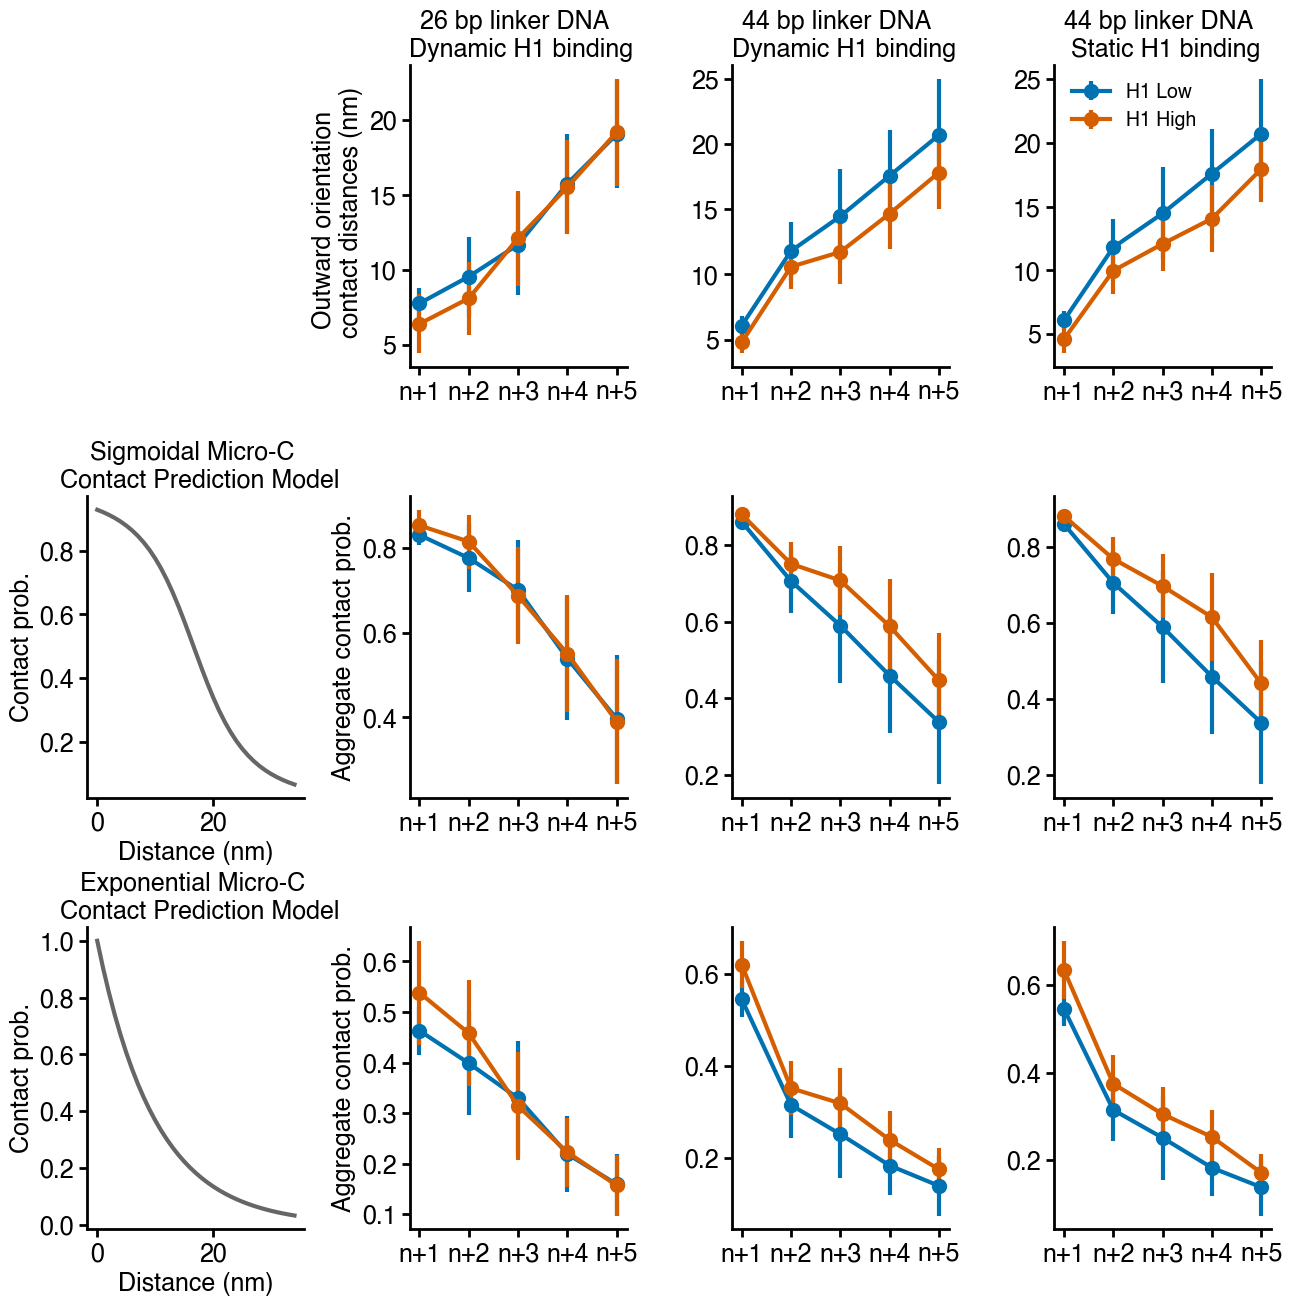

In [53]:
total_snaps = 1000 # make 1000 at the end
nucs = 100
fig, ax = plt.subplots(3, 4, figsize=(13, 13), gridspec_kw={'width_ratios': [3, 3, 3, 3]})
exp_length_scale = 10

# define exponential
exp_microc_func = lambda x: np.exp(-x / exp_length_scale)


for cond in range(len(subdirs_short)):
#     print(cond)
    for traj in range(len(end_dirs_limited[cond])):
        dfs_dir = f"{schlick_folder}{subdirs_short[cond]}/{end_dirs_limited[cond][traj]}/dfs/"
        dists = process_trajectory_out(dfs_dir, total_snaps, nucs)
        distances = np.array([np.mean(dists[i]) for i in range(1, 6)])
        errors = np.array([np.std(dists[i]) for i in range(1, 6)])
        
        sigmoid_microc = np.array([np.mean(utils.sigmoid(dists[i])) for i in range(1, 6)])
        sigmoid_microc_errs = np.array([np.std(utils.sigmoid(dists[i])) for i in range(1, 6)])
        
        
#         microc_ecxnp.exp(-dists[i] / exp_length_scale)
        exp_microc =  np.array([np.mean(exp_microc_func(dists[i])) for i in range(1, 6)])
        exp_microc_errs =  np.array([np.std(exp_microc_func(dists[i])) for i in range(1, 6)])
#         
        # Plotting
        ax[0, cond+1].errorbar(['n+1', 'n+2', 'n+3', 'n+4', 'n+5'], distances, yerr=errors, label=track_labels[cond][traj], marker="o")
        ax[1, cond+1].errorbar(['n+1', 'n+2', 'n+3', 'n+4', 'n+5'], sigmoid_microc, yerr=sigmoid_microc_errs, label=track_labels[cond][traj], marker="o")
        ax[2, cond+1].errorbar(['n+1', 'n+2', 'n+3', 'n+4', 'n+5'], exp_microc, yerr=exp_microc_errs, label=track_labels[cond][traj], marker="o")        
#         ax[0, cond+1].legend()


# Plot sigmoid
ax[1,0].set_title('Sigmoidal Micro-C \n Contact Prediction Model')
sig_to_plot = [utils.sigmoid(i) for i in range(35)] 
ax[1,0].plot(sig_to_plot, color = 'black', alpha = 0.6)
ax[1,0].set_xlabel("Distance (nm)")
ax[1,0].set_ylabel("Contact prob.")
        
# Plot exp 
ax[2,0].set_title('Exponential Micro-C \n Contact Prediction Model')
exp_to_plt = [exp_microc_func(x) for x in range(0,35)]
ax[2,0].plot(exp_to_plt, color = 'black', alpha = 0.6)
ax[2,0].set_xlabel("Distance (nm)")
ax[2,0].set_ylabel("Contact prob.")    
    
# Label graphs
ax[0,1].set_title('26 bp linker DNA \n Dynamic H1 binding')
ax[0,2].set_title('44 bp linker DNA \n Dynamic H1 binding')
ax[0,3].set_title('44 bp linker DNA \n Static H1 binding')

ax[0,1].set_ylabel('Outward orientation \n contact distances (nm)')
ax[1,1].set_ylabel("Aggregate contact prob.") 
ax[2,1].set_ylabel("Aggregate contact prob.") 



# Add legend
ax[0, 3].legend(frameon=False, fontsize = 14)
# ax[0, 1].legend(frameon=False, fontsize = 14)
# ax[0, 2].legend(frameon=False, fontsize = 14)

#Hide unneeded plots
ax[0, 0].axis('off')
[ax[i,j].spines['right'].set_visible(False) for i in range(0,3) for j in range(0,4)]
[ax[i,j].spines['top'].set_visible(False) for i in range(0,3) for j in range(0,4)]

plt.tight_layout(pad = 0.5)
# plt.savefig(plots_dir + 'micro_c/linker_histone_micro_c_plots_OUTWARD.pdf')
plt.show()

In [124]:
in_positions = np.array(positions_df[positions_df.first_bead > 0][['x','y','z']])
out_positions = np.array(positions_df[positions_df.last_bead > 0][['x','y','z']])
in_dists = cdist(in_positions, out_positions)
out_dists = cdist(out_positions, in_positions)

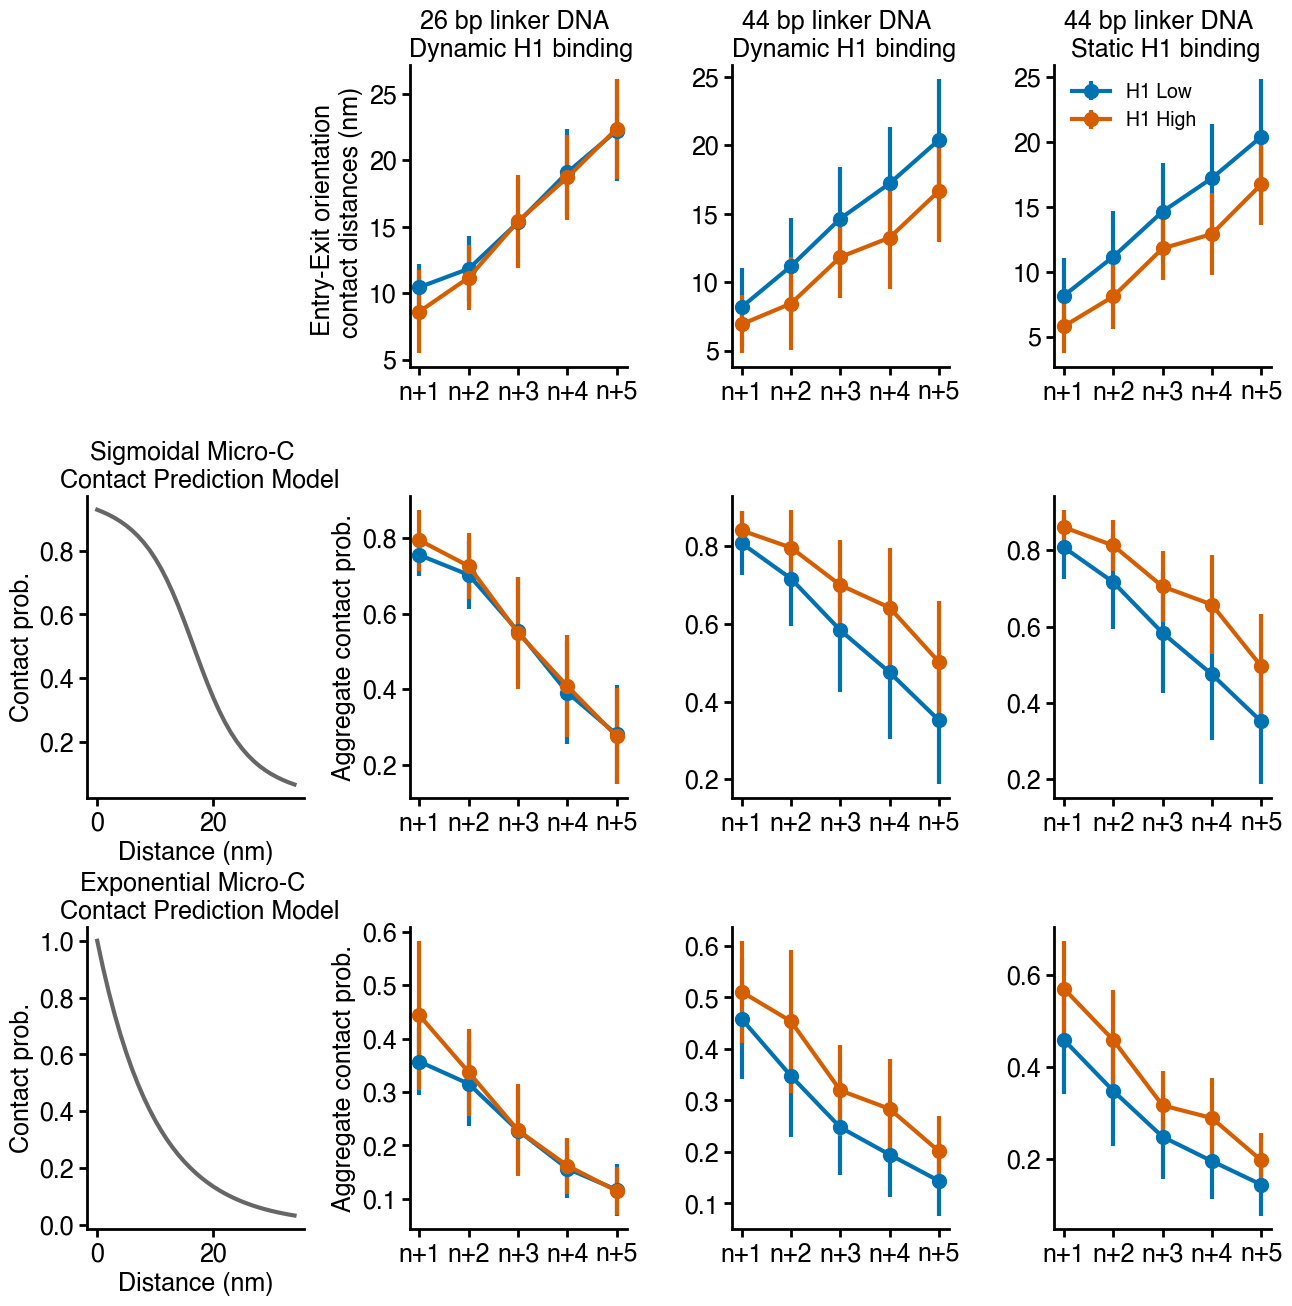

In [16]:
total_snaps = 1000 # make 1000 at the end
nucs = 100
fig, ax = plt.subplots(3, 4, figsize=(13, 13), gridspec_kw={'width_ratios': [3, 3, 3, 3]})
exp_length_scale = 10

# define exponential
exp_microc_func = lambda x: np.exp(-x / exp_length_scale)


for cond in range(len(subdirs_short)):
#     print(cond)
    for traj in range(len(end_dirs_limited[cond])):
        dfs_dir = f"{schlick_folder}{subdirs_short[cond]}/{end_dirs_limited[cond][traj]}/dfs/"
        dists = process_trajectory_in(dfs_dir, total_snaps, nucs)
        distances = np.array([np.mean(dists[i]) for i in range(1, 6)])
        errors = np.array([np.std(dists[i]) for i in range(1, 6)])
        
        sigmoid_microc = np.array([np.mean(utils.sigmoid(dists[i])) for i in range(1, 6)])
        sigmoid_microc_errs = np.array([np.std(utils.sigmoid(dists[i])) for i in range(1, 6)])
        
        
#         microc_ecxnp.exp(-dists[i] / exp_length_scale)
        exp_microc =  np.array([np.mean(exp_microc_func(dists[i])) for i in range(1, 6)])
        exp_microc_errs =  np.array([np.std(exp_microc_func(dists[i])) for i in range(1, 6)])
#         
        # Plotting
        ax[0, cond+1].errorbar(['n+1', 'n+2', 'n+3', 'n+4', 'n+5'], distances, yerr=errors, label=track_labels[cond][traj], marker="o")
        ax[1, cond+1].errorbar(['n+1', 'n+2', 'n+3', 'n+4', 'n+5'], sigmoid_microc, yerr=sigmoid_microc_errs, label=track_labels[cond][traj], marker="o")
        ax[2, cond+1].errorbar(['n+1', 'n+2', 'n+3', 'n+4', 'n+5'], exp_microc, yerr=exp_microc_errs, label=track_labels[cond][traj], marker="o")        
#         ax[0, cond+1].legend()


# Plot sigmoid
ax[1,0].set_title('Sigmoidal Micro-C \n Contact Prediction Model')
sig_to_plot = [utils.sigmoid(i) for i in range(35)] 
ax[1,0].plot(sig_to_plot, color = 'black', alpha = 0.6)
ax[1,0].set_xlabel("Distance (nm)")
ax[1,0].set_ylabel("Contact prob.")
        
# Plot exp 
ax[2,0].set_title('Exponential Micro-C \n Contact Prediction Model')
exp_to_plt = [exp_microc_func(x) for x in range(0,35)]
ax[2,0].plot(exp_to_plt, color = 'black', alpha = 0.6)
ax[2,0].set_xlabel("Distance (nm)")
ax[2,0].set_ylabel("Contact prob.")    
    
# Label graphs
ax[0,1].set_title('26 bp linker DNA \n Dynamic H1 binding')
ax[0,2].set_title('44 bp linker DNA \n Dynamic H1 binding')
ax[0,3].set_title('44 bp linker DNA \n Static H1 binding')

ax[0,1].set_ylabel('Entry-Exit orientation \n contact distances (nm)')
ax[1,1].set_ylabel("Aggregate contact prob.") 
ax[2,1].set_ylabel("Aggregate contact prob.") 



# Add legend
ax[0, 3].legend(frameon=False, fontsize = 14)
# ax[0, 1].legend(frameon=False, fontsize = 14)
# ax[0, 2].legend(frameon=False, fontsize = 14)

#Hide unneeded plots
ax[0, 0].axis('off')
[ax[i,j].spines['right'].set_visible(False) for i in range(0,3) for j in range(0,4)]
[ax[i,j].spines['top'].set_visible(False) for i in range(0,3) for j in range(0,4)]

plt.tight_layout(pad = 0.5)
# plt.savefig(plots_dir + 'micro_c/linker_histone_micro_c_plots_ENTRY-EXIT.pdf')
plt.show()

In [34]:
dfs_dir = '/ru-auth/local/home/abrenner/myscratch/data_from_schlick/26_D/26bp_0_1/dfs/'
nucs = 100
dists = process_trajectory_out(dfs_dir, total_snaps, nucs)

In [35]:
dists[1][0]
# plt.hist(dists[1].flatten(), bins = 30)

array([ 8.28814387,  8.1057113 ,  7.80822345,  6.35528808, 10.08143956,
        8.69128969,  8.22218619,  8.12701474,  7.61924239,  6.09916488,
        8.55640725,  7.1986103 ,  7.42010247,  9.71776255,  7.61707167,
        8.66018333,  7.53335142,  8.9283901 ,  7.25900421,  7.32071847,
        7.35349377,  8.35170653,  8.06607277,  8.14331078,  8.8156403 ,
        9.24202217,  5.63942554,  8.50015564,  7.38403292,  7.95974851,
        7.10841542,  6.92617053,  7.68585808,  7.59909669,  7.15013383,
        7.05672849,  7.16263571,  8.36555144,  7.27905653,  7.63489388,
        6.8165389 ,  9.45796104,  8.64385098,  7.65821488,  7.2331246 ,
        9.24395346,  7.42391531,  6.8428186 ,  8.20842341,  8.67575344,
        7.42618453,  8.3843992 ,  7.71068729,  7.2309055 ,  7.04497758,
        8.46217814,  9.80220093,  7.41777067,  9.87096666,  6.69770266,
        8.85396325,  8.58059986,  7.86925731,  8.47581153,  6.70126449,
        8.70090889,  6.66391997,  9.42215751,  7.3092944 ,  7.28

In [44]:
# dfs_dir
total_snaps = 1000
dists = {i: np.zeros((total_snaps, nucs - i)) for i in range(1, 6)}
i = 0
positions = pd.read_csv(f"{dfs_dir}flagged_linkers_{i}snap.csv")
snapshot_dists_outward = get_outward_dists(positions_df=positions, snapshot=i)
for j in range(1, 6):
    dists[j][i] = np.diagonal(snapshot_dists_outward, offset=j)

In [46]:
np.diagonal(snapshot_dists_outward, offset = 0)

array([3.30767625, 3.00704406, 3.11864063, 3.43771364, 2.66174492,
       2.89885768, 3.00512652, 2.7822538 , 2.91852308, 2.74310815,
       3.65046617, 3.1138038 , 2.90074615, 3.22511951, 2.53257842,
       3.08346579, 2.70389335, 2.76279024, 3.22332698, 2.74726149,
       2.8045861 , 2.99864109, 3.59726017, 3.11595562, 3.00374811,
       2.73989607, 2.93120648, 3.25643414, 3.51759294, 3.49242102,
       3.10077241, 3.02408252, 2.6905925 , 2.93551456, 2.73369549,
       2.87775654, 3.344203  , 3.07186389, 3.1990885 , 2.97528386,
       3.00922505, 3.62692766, 2.49063303, 3.04442196, 2.38911589,
       2.9177437 , 3.26184383, 2.93798529, 3.05332061, 2.85596664,
       3.08022554, 3.11524587, 3.73837306, 3.05874463, 3.07154403,
       2.91801364, 3.18654608, 3.02864176, 3.37246698, 2.74788961,
       3.23464798, 2.92356982, 2.71362687, 2.79544292, 3.13583223,
       2.92749305, 3.29279631, 2.59863293, 3.23159286, 3.17212228,
       3.32167075, 3.08586202, 2.99859592, 2.6447571 , 2.86222

In [92]:
dists[2][0]

array([ 9.16528091, 13.58886281, 11.11687741, 13.17093988, 16.0528731 ,
       15.86777383, 12.62077264, 11.83124637, 11.17718363, 12.52243122,
       11.54562713, 11.92246094, 10.96967481, 12.68960488,  8.02943183,
       12.14823802,  8.83946819, 13.74996342,  9.30430803, 10.77711   ,
        6.64958135, 17.34332918, 12.05586361, 12.24618667, 12.32702265,
        8.06487685, 13.55185205,  7.17451252, 14.81679171, 10.61303669,
       13.40695718, 12.59598251, 11.32305139, 15.66510358, 10.97576169,
       12.640426  , 11.17420499, 11.43018049, 11.05568163, 12.45029815,
       10.07804083, 15.54451994,  7.57943919, 12.38886277, 12.01765226,
       15.33104433,  8.30987342, 12.86367399, 11.03353841, 10.76126794,
       14.04603189,  9.10871294, 10.77972931, 10.26780855,  8.7417517 ,
       15.90897485,  6.59314588, 12.42877585, 10.5496963 ,  6.02265371,
       13.42195505,  9.48843246, 11.5572546 , 10.41456288, 12.50918098,
       11.34298805, 13.37395843, 15.15301105, 10.58205675, 13.44

In [59]:
np.sum(np.diagonal(in_dists, offset=1) != np.diagonal(out_dists, offset=-1))

NameError: name 'in_dists' is not defined

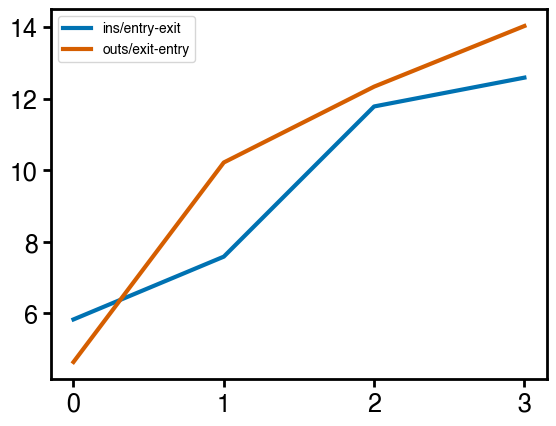

In [150]:
ins = np.array([np.mean(np.diagonal(in_dists, offset=1)), np.mean(np.diagonal(in_dists, offset=2)), np.mean(np.diagonal(in_dists, offset=3)), np.mean(np.diagonal(in_dists, offset=4))])
outs = np.array([np.mean(np.diagonal(out_dists, offset=1)), np.mean(np.diagonal(out_dists, offset=2)), np.mean(np.diagonal(out_dists, offset=3)), np.mean(np.diagonal(out_dists, offset=4))])
plt.plot(ins, label = "ins/entry-exit")
plt.plot(outs, label = 'outs/exit-entry')
plt.legend()

In [136]:
np.diagonal(out_dists, offset=-1)

array([ 6.79698473,  7.90050731,  7.32538056,  8.06477483,  2.72399939,
       11.14859301,  6.05711183,  5.25932316,  7.29683314,  6.70063626,
        5.96874611,  4.38189499,  6.32009095,  5.44832941,  6.42558834,
        4.22378697,  9.6679386 ,  4.93418921,  3.94636946,  5.09037888,
        6.83461486,  5.11649426,  4.73584536,  5.57036615,  4.29019255,
        4.27604799,  3.69133424, 10.15780006,  3.54414665,  7.66432781,
        5.93563454,  5.28219684,  4.9457746 ,  4.13862075,  5.20835574,
        8.27450416,  4.47571009,  6.68848802,  7.57395014,  5.88321189,
        4.25216707,  4.44209447,  4.70348315,  7.00940171,  3.82568452,
        3.75937787,  6.4176964 ,  3.54704412, 11.4181353 ,  5.00993352,
        4.32799201,  5.3631131 ,  5.45722832,  4.71865901,  4.18667757,
        5.67374471,  5.94929227,  4.19679924,  4.88853587,  4.00519234,
        5.07125168,  4.92188737,  5.24200918,  4.39877078,  5.91933397,
        3.79410679,  5.38236488,  3.97759807,  4.76776211,  4.75

In [151]:
positions_df

,Unnamed: 0,x,y,z,link_idx,first_bead,last_bead
0,980400,-47.475824,-59.982235,317.967961,0,1,0
1,980404,-47.518867,-62.977000,316.631791,0,0,0
2,980408,-48.228404,-66.367386,316.814214,0,0,0
3,980412,-48.277382,-68.110658,317.652758,0,0,1
4,980416,-49.844924,-66.976008,311.987286,1,2,0
...,...,...,...,...,...,...,...
395,981980,55.498714,96.738661,192.902176,98,0,99
396,981984,60.154104,98.930875,190.107666,99,100,0
397,981988,60.296604,100.071133,193.047620,99,0,0
398,981992,60.006858,101.032307,195.486149,99,0,0
